In [426]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [76]:
if os.environ.get('OS','') == 'Windows_NT':
    sys.path.append('c:/projects/python/mriprog/CardioMiner')
else:
    sys.path.append('~/projects/python/mriprog/CardioMiner')

In [77]:
import os, sys
import pickle 
import matplotlib.pyplot as plt
import numpy as np
import model_training_and_eval as mte
import orgim_scr as oi
import pydicom

In [78]:
sys.version

'3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]'

1 DATA SETS

Read DICOM tags

In [399]:
stud = 'PM'
prm = oi.userGetOrg(stud)

In [400]:
prm.keys()

dict_keys(['stud', 'usr', 'vrb', 'Pt', 'drecs', 'PDLink', 'gr', 'sv', 'Input', 'Tbl', 'Ptsgm', 'drecssgm', 'inf', 'Inf', 'filepath', 'filepathDel'])

In [401]:
p = 2
def ptidx(prm,p):
    idx = [i for i in range(len(prm['PDLink'])) if prm['Pt'][p] == prm['PDLink'][i]]
    return idx
oi.ptidx(prm,p)

[34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]

In [433]:
def maxval(prm, k):
    if prm['stud'] == 'haglag2':
        drecs = prm['drecs'][k]
    else:
        drecs = np.ndarray.tolist(prm['drecs'][k])
    dcmf = os.path.join(prm['filepath'],drecs).replace('\\','/')
    #print(dcmf)
    ds = pydicom.dcmread(dcmf)
    img = pydicom.read_file(dcmf)
    imx = np.max(img.pixel_array)
    #print(ds.BitsStored)
    mv = 2**ds.BitsStored-1
    ba = ds.BitsAllocated
    bs = ds.BitsStored
    hb = ds.HighBit
    print(ds.SamplesPerPixel)
    #print(2**ds.BitsStored-1)

    return mv, ba, bs, hb, img
mv, ba, bs, hb, imx, img = oi.maxval(prm,0,True)


SamplesperPixel 1, Max pixel value 142


In [414]:
img[0x00880200]

<Sequence, length 1>

In [421]:
img.pixel_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

In [517]:
vrb = True
S = {'Pt': [], 'min': [], 'max': []}
for p in range(len(prm['Pt'])):
    print(f'\n{p+1}:{len(prm["Pt"])} {prm["Pt"][p]}')
    #print(prm["Pt"][p])
    idx = ptidx(prm,p)
    MV = []
    BA = []
    BS = []
    HB = []
    IM = []
    for k in idx:
        mv, ba, bs, hb, imx, img = oi.maxval(prm,k)
        MV.append(mv)
        BA.append(ba)
        BS.append(bs)
        HB.append(hb)
        IM.append(imx)
    rows = np.unique(MV)
    cols = np.unique(BA)
    bs = np.unique(BS)
    hb = np.unique(HB)
    im = np.unique(IM)
    S['Pt'].append(prm['Pt'][p])
    if len(im) > 0:
        S['min'].append(np.min(im))
        S['max'].append(np.max(im))
    else:
        S['min'].append(np.nan)
        S['max'].append(np.nan)
    if vrb:
        try:
            print(f'{prm["Pt"][p]} Size {rows}x{cols} Slice pixel value range {np.min(im)}-{np.max(im)}')
        except:
            print('Not printable')
 
    
    


1:242 PM009


PM009 Size [512]x[512] Slice pixel value range 142-244

2:242 PM010


PM010 Size [512]x[512] Slice pixel value range 147-267

3:242 PM011


PM011 Size [512]x[512] Slice pixel value range 190-287

4:242 PM013


PM013 Size [512]x[512] Slice pixel value range 145-274

5:242 PM014


PM014 Size [512]x[512] Slice pixel value range 134-240

6:242 PM016


PM016 Size [512]x[512] Slice pixel value range 181-254

7:242 PM017


PM017 Size [512]x[512] Slice pixel value range 133-260

8:242 PM018


PM018 Size [512]x[512] Slice pixel value range 186-399

9:242 PM019


PM019 Size [512]x[512] Slice pixel value range 157-308

10:242 PM020


PM020 Size [512]x[512] Slice pixel value range 147-252

11:242 PM021


PM021 Size [512]x[512] Slice pixel value range 145-347

12:242 PM023


PM023 Size [512]x[512] Slice pixel value range 143-239

13:242 PM025


PM025 Size [512]x[512] Slice pixel value range 177-304

14:242 PM028


PM028 Size [512]x[512] Slice pixel value range 162-295

15:242 PM029


PM029 Size [512]x[512] Slice pixel value range 161-282

16:242 PM035


PM035 Size [512]x[512] Slice pixel value range 258-575

17:242 PM036


PM036 Size [512]x[512] Slice pixel value range 177-325

18:242 PM037


PM037 Size [512]x[512] Slice pixel value range 162-341

19:242 PM038


PM038 Size [512]x[512] Slice pixel value range 223-295

20:242 PM039


PM039 Size [512]x[512] Slice pixel value range 167-675

21:242 PM040


PM040 Size [512]x[512] Slice pixel value range 224-648

22:242 PM045


PM045 Size [512]x[512] Slice pixel value range 161-238

23:242 PM047


PM047 Size [512]x[512] Slice pixel value range 202-451

24:242 PM048


PM048 Size [640]x[640] Slice pixel value range 211-424

25:242 PM049


PM049 Size [512]x[512] Slice pixel value range 122-351

26:242 PM053


PM053 Size [512]x[512] Slice pixel value range 209-233

27:242 PM057


PM057 Size [512]x[512] Slice pixel value range 161-238

28:242 PM058


PM058 Size [560]x[560] Slice pixel value range 295-363

29:242 PM060


PM060 Size [512]x[512] Slice pixel value range 120-212

30:242 PM061


PM061 Size [512 528]x[512 528] Slice pixel value range 208-295

31:242 PM062


PM062 Size [512 528 560]x[512 528 560] Slice pixel value range 146-244

32:242 PM064


PM064 Size [640]x[640] Slice pixel value range 337-959

33:242 PM065


PM065 Size [512]x[512] Slice pixel value range 209-392

34:242 PM067


PM067 Size [528]x[528] Slice pixel value range 175-264

35:242 PM068


PM068 Size [512 560]x[512 560] Slice pixel value range 141-285

36:242 PM069


PM069 Size [560]x[560] Slice pixel value range 215-281

37:242 PM070


PM070 Size [512]x[512] Slice pixel value range 143-235

38:242 PM071


PM071 Size [512]x[512] Slice pixel value range 113-295

39:242 PM072


PM072 Size [512 560]x[512 560] Slice pixel value range 184-575

40:242 PM074


PM074 Size [528]x[528] Slice pixel value range 158-369

41:242 PM075


PM075 Size [528]x[528] Slice pixel value range 162-347

42:242 PM076


PM076 Size [560]x[560] Slice pixel value range 165-379

43:242 PM078


PM078 Size [512]x[512] Slice pixel value range 132-197

44:242 PM079


PM079 Size [640]x[640] Slice pixel value range 321-504

45:242 PM080


PM080 Size [512 560]x[512 560] Slice pixel value range 121-269

46:242 PM081


PM081 Size [512]x[512] Slice pixel value range 267-548

47:242 PM082


PM082 Size [512]x[512] Slice pixel value range 219-480

48:242 PM084


PM084 Size [640]x[640] Slice pixel value range 146-245

49:242 PM085


PM085 Size [576]x[576] Slice pixel value range 114-226

50:242 PM087


PM087 Size [560]x[560] Slice pixel value range 202-282

51:242 PM088


PM088 Size [512 528]x[512 528] Slice pixel value range 157-409

52:242 PM090


PM090 Size [512]x[512] Slice pixel value range 121-501

53:242 PM091


PM091 Size [512 528]x[512 528] Slice pixel value range 148-268

54:242 PM092


PM092 Size [528]x[528] Slice pixel value range 167-220

55:242 PM095


PM095 Size [640]x[640] Slice pixel value range 131-322

56:242 PM096


PM096 Size [512]x[512] Slice pixel value range 163-268

57:242 PM097


PM097 Size [512]x[512] Slice pixel value range 180-377

58:242 PM098


PM098 Size [560]x[560] Slice pixel value range 156-347

59:242 PM099


PM099 Size [512]x[512] Slice pixel value range 183-276

60:242 PM100


PM100 Size [560]x[560] Slice pixel value range 183-261

61:242 PM101


PM101 Size [576]x[576] Slice pixel value range 143-231

62:242 PM103


PM103 Size [512 560]x[512 560] Slice pixel value range 196-302

63:242 PM104


PM104 Size [512]x[512] Slice pixel value range 213-284

64:242 PM105


PM105 Size [560]x[560] Slice pixel value range 81-246

65:242 PM106


PM106 Size [512]x[512] Slice pixel value range 183-228

66:242 PM107


PM107 Size [560]x[560] Slice pixel value range 239-311

67:242 PM108


PM108 Size [512]x[512] Slice pixel value range 187-395

68:242 PM109


PM109 Size [512 560]x[512 560] Slice pixel value range 164-230

69:242 PM110


PM110 Size [512]x[512] Slice pixel value range 148-244

70:242 PM111


PM111 Size [528]x[528] Slice pixel value range 138-197

71:242 PM113


PM113 Size [528]x[528] Slice pixel value range 176-246

72:242 PM114


PM114 Size [512]x[512] Slice pixel value range 156-273

73:242 PM115


PM115 Size [512]x[512] Slice pixel value range 168-294

74:242 PM117


PM117 Size [512]x[512] Slice pixel value range 187-274

75:242 PM118


PM118 Size [528]x[528] Slice pixel value range 213-432

76:242 PM119


PM119 Size [528 560]x[528 560] Slice pixel value range 177-265

77:242 PM120


PM120 Size [576 640]x[576 640] Slice pixel value range 137-246

78:242 PM121


PM121 Size [512 528]x[512 528] Slice pixel value range 185-273

79:242 PM122


PM122 Size [528]x[528] Slice pixel value range 156-332

80:242 PM123


PM123 Size [512]x[512] Slice pixel value range 121-262

81:242 PM126


PM126 Size [336 512 560 576]x[336 512 560 576] Slice pixel value range 155-461

82:242 PM127


PM127 Size [560]x[560] Slice pixel value range 139-209

83:242 PM128


PM128 Size [560]x[560] Slice pixel value range 142-209

84:242 PM129


PM129 Size [576]x[576] Slice pixel value range 146-253

85:242 PM130


PM130 Size [512]x[512] Slice pixel value range 132-196

86:242 PM131


PM131 Size [528]x[528] Slice pixel value range 117-213

87:242 PM132


PM132 Size [512]x[512] Slice pixel value range 81-157

88:242 PM133


PM133 Size [512 560]x[512 560] Slice pixel value range 214-359

89:242 PM135


PM135 Size [560]x[560] Slice pixel value range 167-360

90:242 PM136


PM136 Size [560]x[560] Slice pixel value range 180-296

91:242 PM138


PM138 Size [512]x[512] Slice pixel value range 160-279

92:242 PM139


PM139 Size [512]x[512] Slice pixel value range 161-321

93:242 PM146


PM146 Size [528]x[528] Slice pixel value range 170-225

94:242 PM148


PM148 Size [512]x[512] Slice pixel value range 175-495

95:242 PM149


PM149 Size [560]x[560] Slice pixel value range 77-310

96:242 PM150


PM150 Size [512]x[512] Slice pixel value range 123-249

97:242 PM152


PM152 Size [512]x[512] Slice pixel value range 123-225

98:242 PM153


PM153 Size [528]x[528] Slice pixel value range 140-219

99:242 PM154


PM154 Size [512 576]x[512 576] Slice pixel value range 111-253

100:242 PM155


PM155 Size [512]x[512] Slice pixel value range 113-254

101:242 PM157


PM157 Size [560]x[560] Slice pixel value range 160-318

102:242 PM158


PM158 Size [640]x[640] Slice pixel value range 272-2067

103:242 PM159


PM159 Size [512]x[512] Slice pixel value range 122-155

104:242 PM160


PM160 Size [512]x[512] Slice pixel value range 196-543

105:242 PM162


PM162 Size [512 560]x[512 560] Slice pixel value range 233-348

106:242 PM164


PM164 Size [512 528]x[512 528] Slice pixel value range 111-285

107:242 PM165


PM165 Size [512 560]x[512 560] Slice pixel value range 157-401

108:242 PM168


PM168 Size [512]x[512] Slice pixel value range 194-243

109:242 PM169


PM169 Size [512 560]x[512 560] Slice pixel value range 202-276

110:242 PM171


PM171 Size [560]x[560] Slice pixel value range 150-243

111:242 PM173


PM173 Size [560 576 640]x[560 576 640] Slice pixel value range 211-405

112:242 PM175


PM175 Size [512]x[512] Slice pixel value range 172-270

113:242 PM176


PM176 Size [560]x[560] Slice pixel value range 188-341

114:242 PM178


PM178 Size [512]x[512] Slice pixel value range 200-321

115:242 PM180


PM180 Size [560 576 640]x[560 576 640] Slice pixel value range 203-453

116:242 PM181


PM181 Size [512]x[512] Slice pixel value range 165-271

117:242 PM182


PM182 Size [512 560 576 640]x[512 560 576 640] Slice pixel value range 279-512

118:242 PM187


PM187 Size [512 528]x[512 528] Slice pixel value range 190-331

119:242 PM188


PM188 Size [512 560]x[512 560] Slice pixel value range 122-481

120:242 PM189


PM189 Size [576]x[576] Slice pixel value range 179-248

121:242 PM191


PM191 Size [512]x[512] Slice pixel value range 172-229

122:242 PM192


PM192 Size [512]x[512] Slice pixel value range 234-369

123:242 PM193


PM193 Size [512]x[512] Slice pixel value range 172-264

124:242 PM194


PM194 Size [576]x[576] Slice pixel value range 190-310

125:242 PM197


PM197 Size [512 560]x[512 560] Slice pixel value range 214-420

126:242 PM198


PM198 Size [512 528 560 576]x[512 528 560 576] Slice pixel value range 205-505

127:242 PM199


PM199 Size [512 560]x[512 560] Slice pixel value range 162-295

128:242 PM200


PM200 Size [528]x[528] Slice pixel value range 254-391

129:242 PM202


PM202 Size [512 560]x[512 560] Slice pixel value range 200-321

130:242 PM204


PM204 Size [560]x[560] Slice pixel value range 276-348

131:242 PM205


PM205 Size [512 528]x[512 528] Slice pixel value range 223-412

132:242 PM207


PM207 Size [528]x[528] Slice pixel value range 258-761

133:242 PM209


PM209 Size [512 528]x[512 528] Slice pixel value range 207-269

134:242 PM213


PM213 Size [512 528]x[512 528] Slice pixel value range 201-276

135:242 PM214


PM214 Size [512 528]x[512 528] Slice pixel value range 115-387

136:242 PM216


PM216 Size [528 560 576]x[528 560 576] Slice pixel value range 268-344

137:242 PM217


PM217 Size [640]x[640] Slice pixel value range 132-275

138:242 PM218


PM218 Size [512 528]x[512 528] Slice pixel value range 233-512

139:242 PM219


PM219 Size [512]x[512] Slice pixel value range 160-257

140:242 PM220


PM220 Size [512 528]x[512 528] Slice pixel value range 133-323

141:242 PM222


PM222 Size [512 528]x[512 528] Slice pixel value range 150-370

142:242 PM224


PM224 Size [512 528 560]x[512 528 560] Slice pixel value range 174-313

143:242 PM225


PM225 Size [512 528]x[512 528] Slice pixel value range 179-311

144:242 PM227


PM227 Size [512 560]x[512 560] Slice pixel value range 162-284

145:242 PM228


PM228 Size [512 560]x[512 560] Slice pixel value range 216-317

146:242 PM229


PM229 Size [512 528 560]x[512 528 560] Slice pixel value range 153-270

147:242 PM230


PM230 Size [528 560]x[528 560] Slice pixel value range 291-584

148:242 PM232


PM232 Size [512 528]x[512 528] Slice pixel value range 183-374

149:242 PM233


PM233 Size [512 528 576]x[512 528 576] Slice pixel value range 223-509

150:242 PM234


PM234 Size [512 528]x[512 528] Slice pixel value range 193-261

151:242 PM235


PM235 Size [512 528]x[512 528] Slice pixel value range 157-337

152:242 PM238


PM238 Size [512 560]x[512 560] Slice pixel value range 222-548

153:242 PM239


PM239 Size [512 560]x[512 560] Slice pixel value range 212-440

154:242 PM240


PM240 Size [512 528]x[512 528] Slice pixel value range 263-510

155:242 PM241


PM241 Size [512 528]x[512 528] Slice pixel value range 375-588

156:242 PM242


PM242 Size [512 528 560]x[512 528 560] Slice pixel value range 244-342

157:242 PM243


PM243 Size [512 528]x[512 528] Slice pixel value range 230-496

158:242 PM245


PM245 Size [512 528]x[512 528] Slice pixel value range 172-299

159:242 PM246


PM246 Size [512 528]x[512 528] Slice pixel value range 212-376

160:242 PM247


PM247 Size [528]x[528] Slice pixel value range 282-757

161:242 PM249


PM249 Size [512 528]x[512 528] Slice pixel value range 245-341

162:242 PM251


PM251 Size [512 528]x[512 528] Slice pixel value range 198-309

163:242 PM252


PM252 Size [512]x[512] Slice pixel value range 204-566

164:242 PM255


PM255 Size [384 432 448 512]x[384 432 448 512] Slice pixel value range 110-240

165:242 PM256


PM256 Size [432 528 560]x[432 528 560] Slice pixel value range 137-419

166:242 PM259


PM259 Size [384 448]x[384 448] Slice pixel value range 286-740

167:242 PM260


PM260 Size [512 528 560]x[512 528 560] Slice pixel value range 169-305

168:242 PM261


PM261 Size [576]x[576] Slice pixel value range 224-338

169:242 PM263


PM263 Size [448 480]x[448 480] Slice pixel value range 107-548

170:242 PM264


PM264 Size [384 448]x[384 448] Slice pixel value range 174-280

171:242 PM265


PM265 Size [384 448 560]x[384 448 560] Slice pixel value range 132-506

172:242 PM267


PM267 Size [432 448 640]x[432 448 640] Slice pixel value range 96-298

173:242 PM268


PM268 Size [384 448]x[384 448] Slice pixel value range 142-411

174:242 PM269


PM269 Size [384 448]x[384 448] Slice pixel value range 186-291

175:242 PM270


PM270 Size [384 448]x[384 448] Slice pixel value range 163-469

176:242 PM271


PM271 Size [384 448]x[384 448] Slice pixel value range 220-573

177:242 PM272


PM272 Size [512 528 560]x[512 528 560] Slice pixel value range 172-266

178:242 PM273


PM273 Size [512 528]x[512 528] Slice pixel value range 194-413

179:242 PM274


PM274 Size [512]x[512] Slice pixel value range 218-312

180:242 PM276


PM276 Size [512 560]x[512 560] Slice pixel value range 172-395

181:242 PM277


PM277 Size [512 528 560]x[512 528 560] Slice pixel value range 177-819

182:242 PM278


PM278 Size [432 448]x[432 448] Slice pixel value range 123-247

183:242 PM279


PM279 Size [384 448 480]x[384 448 480] Slice pixel value range 171-355

184:242 PM280


PM280 Size [512 528]x[512 528] Slice pixel value range 146-306

185:242 PM281


PM281 Size [512]x[512] Slice pixel value range 165-410

186:242 PM282


PM282 Size [384 448]x[384 448] Slice pixel value range 218-451

187:242 PM283


PM283 Size [384 448]x[384 448] Slice pixel value range 244-371

188:242 PM284


PM284 Size [384 448]x[384 448] Slice pixel value range 191-348

189:242 PM286


PM286 Size [512 528]x[512 528] Slice pixel value range 165-341

190:242 PM287


PM287 Size [512 528]x[512 528] Slice pixel value range 175-274

191:242 PM288


PM288 Size [384 448 480]x[384 448 480] Slice pixel value range 157-363

192:242 PM289


PM289 Size [384 448]x[384 448] Slice pixel value range 104-331

193:242 PM291
Not printable

194:242 PM292


PM292 Size [512 528]x[512 528] Slice pixel value range 166-358

195:242 PM293


PM293 Size [384 400 448]x[384 400 448] Slice pixel value range 158-233

196:242 PM294


PM294 Size [384 448]x[384 448] Slice pixel value range 131-263

197:242 PM295


PM295 Size [512 528]x[512 528] Slice pixel value range 162-355

198:242 PM296


PM296 Size [384 448]x[384 448] Slice pixel value range 118-257

199:242 PM297


PM297 Size [512 528]x[512 528] Slice pixel value range 218-448

200:242 PM298


PM298 Size [512]x[512] Slice pixel value range 255-430

201:242 PM299


PM299 Size [512 528]x[512 528] Slice pixel value range 180-288

202:242 PM301


PM301 Size [384 448]x[384 448] Slice pixel value range 196-347

203:242 PM302


PM302 Size [384 448]x[384 448] Slice pixel value range 128-323

204:242 PM303


PM303 Size [512 528]x[512 528] Slice pixel value range 123-217

205:242 PM304


PM304 Size [448]x[448] Slice pixel value range 179-375

206:242 PM305


PM305 Size [288 384 448]x[288 384 448] Slice pixel value range 138-743

207:242 PM306


PM306 Size [448]x[448] Slice pixel value range 126-187

208:242 PM307


PM307 Size [432 448]x[432 448] Slice pixel value range 116-430

209:242 PM308


PM308 Size [512 528]x[512 528] Slice pixel value range 290-442

210:242 PM310


PM310 Size [400 480 512]x[400 480 512] Slice pixel value range 140-281

211:242 PM311


PM311 Size [384 448]x[384 448] Slice pixel value range 127-459

212:242 PM312


PM312 Size [512 528]x[512 528] Slice pixel value range 269-470

213:242 PM313


PM313 Size [512 528]x[512 528] Slice pixel value range 205-322

214:242 PM314


PM314 Size [448]x[448] Slice pixel value range 169-342

215:242 PM315


PM315 Size [432 448 512]x[432 448 512] Slice pixel value range 92-622

216:242 PM316


PM316 Size [512]x[512] Slice pixel value range 202-451

217:242 PM317


PM317 Size [512 528]x[512 528] Slice pixel value range 280-523

218:242 PM319


PM319 Size [384 448]x[384 448] Slice pixel value range 268-391

219:242 PM320


PM320 Size [512 528]x[512 528] Slice pixel value range 226-374

220:242 PM321


PM321 Size [384 448]x[384 448] Slice pixel value range 143-207

221:242 PM322


PM322 Size [448 576]x[448 576] Slice pixel value range 131-383

222:242 PM324


PM324 Size [512 528 560]x[512 528 560] Slice pixel value range 372-644

223:242 PM325


PM325 Size [384 448]x[384 448] Slice pixel value range 155-454

224:242 PM326


PM326 Size [384 448]x[384 448] Slice pixel value range 639-1058

225:242 PM327


PM327 Size [384 448]x[384 448] Slice pixel value range 609-866

226:242 PM328


PM328 Size [512]x[512] Slice pixel value range 222-551

227:242 PM330


PM330 Size [384 448]x[384 448] Slice pixel value range 191-360

228:242 PM331


PM331 Size [384 448 480]x[384 448 480] Slice pixel value range 126-499

229:242 PM332


PM332 Size [384 448 512]x[384 448 512] Slice pixel value range 597-891

230:242 PM334


PM334 Size [384 448]x[384 448] Slice pixel value range 166-365

231:242 PM336


PM336 Size [384 448]x[384 448] Slice pixel value range 110-243

232:242 PM337


PM337 Size [528 560 640]x[528 560 640] Slice pixel value range 203-358

233:242 PM338


PM338 Size [512 528]x[512 528] Slice pixel value range 209-395

234:242 PM339


PM339 Size [384 448]x[384 448] Slice pixel value range 186-276

235:242 PM340


PM340 Size [512]x[512] Slice pixel value range 311-916

236:242 PM342


PM342 Size [384 448]x[384 448] Slice pixel value range 123-271

237:242 PM343


PM343 Size [384 448]x[384 448] Slice pixel value range 128-399

238:242 PM344


PM344 Size [384 448]x[384 448] Slice pixel value range 135-463

239:242 PM345


PM345 Size [384 400 448]x[384 400 448] Slice pixel value range 147-299

240:242 PM346


PM346 Size [384 448]x[384 448] Slice pixel value range 143-468

241:242 PM348


PM348 Size [384 448]x[384 448] Slice pixel value range 120-283

242:242 PM349


PM349 Size [384 448]x[384 448] Slice pixel value range 142-313


In [518]:
S

{'Pt': ['PM009',
  'PM010',
  'PM011',
  'PM013',
  'PM014',
  'PM016',
  'PM017',
  'PM018',
  'PM019',
  'PM020',
  'PM021',
  'PM023',
  'PM025',
  'PM028',
  'PM029',
  'PM035',
  'PM036',
  'PM037',
  'PM038',
  'PM039',
  'PM040',
  'PM045',
  'PM047',
  'PM048',
  'PM049',
  'PM053',
  'PM057',
  'PM058',
  'PM060',
  'PM061',
  'PM062',
  'PM064',
  'PM065',
  'PM067',
  'PM068',
  'PM069',
  'PM070',
  'PM071',
  'PM072',
  'PM074',
  'PM075',
  'PM076',
  'PM078',
  'PM079',
  'PM080',
  'PM081',
  'PM082',
  'PM084',
  'PM085',
  'PM087',
  'PM088',
  'PM090',
  'PM091',
  'PM092',
  'PM095',
  'PM096',
  'PM097',
  'PM098',
  'PM099',
  'PM100',
  'PM101',
  'PM103',
  'PM104',
  'PM105',
  'PM106',
  'PM107',
  'PM108',
  'PM109',
  'PM110',
  'PM111',
  'PM113',
  'PM114',
  'PM115',
  'PM117',
  'PM118',
  'PM119',
  'PM120',
  'PM121',
  'PM122',
  'PM123',
  'PM126',
  'PM127',
  'PM128',
  'PM129',
  'PM130',
  'PM131',
  'PM132',
  'PM133',
  'PM135',
  'PM136',
  'P

In [453]:
r, c = img.pixel_array.shape
print(f'{r} {c}')
2*r*c

512 512


524288

In [454]:
print(prm['Pt'])

['PM009' 'PM010' 'PM011' 'PM013' 'PM014' 'PM016' 'PM017' 'PM018' 'PM019'
 'PM020' 'PM021' 'PM023' 'PM025' 'PM028' 'PM029' 'PM035' 'PM036' 'PM037'
 'PM038' 'PM039' 'PM040' 'PM045' 'PM047' 'PM048' 'PM049' 'PM053' 'PM057'
 'PM058' 'PM060' 'PM061' 'PM062' 'PM064' 'PM065' 'PM067' 'PM068' 'PM069'
 'PM070' 'PM071' 'PM072' 'PM074' 'PM075' 'PM076' 'PM078' 'PM079' 'PM080'
 'PM081' 'PM082' 'PM084' 'PM085' 'PM087' 'PM088' 'PM090' 'PM091' 'PM092'
 'PM095' 'PM096' 'PM097' 'PM098' 'PM099' 'PM100' 'PM101' 'PM103' 'PM104'
 'PM105' 'PM106' 'PM107' 'PM108' 'PM109' 'PM110' 'PM111' 'PM113' 'PM114'
 'PM115' 'PM117' 'PM118' 'PM119' 'PM120' 'PM121' 'PM122' 'PM123' 'PM126'
 'PM127' 'PM128' 'PM129' 'PM130' 'PM131' 'PM132' 'PM133' 'PM135' 'PM136'
 'PM138' 'PM139' 'PM146' 'PM148' 'PM149' 'PM150' 'PM152' 'PM153' 'PM154'
 'PM155' 'PM157' 'PM158' 'PM159' 'PM160' 'PM162' 'PM164' 'PM165' 'PM168'
 'PM169' 'PM171' 'PM173' 'PM175' 'PM176' 'PM178' 'PM180' 'PM181' 'PM182'
 'PM187' 'PM188' 'PM189' 'PM191' 'PM192' 'PM193' 'P

In [455]:
# Show DICOM header info
if False:
    for d in ds:
        print(d)

In [456]:
idx = [0x00280100, 0x00280101, 0x00280102]

In [457]:
for i in idx:
    elm = ds[i]
    print(f'{elm.name} {str(elm.value)}')
    #print(elm)

Bits Allocated 16
Bits Stored 12
High Bit 11


In [458]:
2**ds[idx[1]].value-1

4095

In [459]:
ds.BitsAllocated

16

Extract patches for training and testing model

In [460]:
# Run this to extract data for PM dataset. Other options are haglag and vxvy
%run python -m get_images_and_masks -d PM

In [461]:
P_PATH = 'P:/data/mri/patches'
data_g = [g for g in os.listdir(P_PATH) if 'grouped' in g]
data_v = [g for g in os.listdir(P_PATH) if 'validation' in g]
data_p = [g for g in os.listdir(P_PATH) if 'presplit' in g]
print(data_g)
print(data_v)
print(data_p)


['PM_test_patients_0_15_grouped.p', 'haglag_test_patients_0_15_grouped.p']
['PM_imgs_and_Mmyo_0_15_validation.p', 'haglag_imgs_and_Mmyo_0_15_validation.p']
['PM_presplit.p', 'haglag_presplit.p']


In [462]:
STUDY = ['PM', 'haglag']
DATA = {}
for s in STUDY:
    DATA[s] = [g for g in os.listdir(P_PATH) if s in g]
DATA

{'PM': ['PM_test_patients_0_15_grouped.p',
  'PM_imgs_and_Mmyo_0_15_validation.p',
  'PM_presplit.p'],
 'haglag': ['haglag_test_patients_0_15_grouped.p',
  'haglag_imgs_and_Mmyo_0_15_validation.p',
  'haglag_presplit.p']}

In [463]:
s = 'PM'
d_p = [d for d in DATA[s] if 'presplit' in d][0]
d_g = [d for d in DATA[s] if 'grouped' in d][0]
d_v = [d for d in DATA[s] if 'validation' in d][0]
d_p

'PM_presplit.p'

In [464]:
PICKLE_PATH = os.path.join(P_PATH,d_g)

1.1 EXPLORING PRESPLIT DATA

As described in explanation of pred_patient_set in model_training_and_eval.py

     {'ABC1': [
        [img1, img2, img3, img4, ...],
        [mask1, mask2, mask3, mask4, ...],
        ],
     'DEF2': [
        [img1, img2, img3, img4, ...],
        [mask1, mask2, mask3, mask4, ...],
        ],
     'GHI3': [
        ...
     ]
    }

In [465]:
with open(PICKLE_PATH, "rb") as input_file:
    data = pickle.load(input_file)

In [466]:
PICKLE_PATH

'P:/data/mri/patches\\PM_test_patients_0_15_grouped.p'

In [467]:
Pt = [*data.keys()]
print(Pt)

['PM123', 'PM240', 'PM271', 'PM346', 'PM295', 'PM136', 'PM321', 'PM188', 'PM325', 'PM105', 'PM068', 'PM014', 'PM072', 'PM304', 'PM064', 'PM330', 'PM176', 'PM110', 'PM149', 'PM255', 'PM209', 'PM267', 'PM074', 'PM099', 'PM340', 'PM324', 'PM139', 'PM298', 'PM277', 'PM310', 'PM038', 'PM317', 'PM131', 'PM269', 'PM039', 'PM132', 'PM080', 'PM067', 'PM273', 'PM069', 'PM023', 'PM061', 'PM009', 'PM322', 'PM160', 'PM319', 'PM090', 'PM152', 'PM060', 'PM036', 'PM191', 'PM259', 'PM182', 'PM171', 'PM113', 'PM084', 'PM199', 'PM287']



k, i = 0, 2
Pt[k] = 'PM123'
img  = data['PM123'][0][2] (image #2 size (256, 256))
mask = data['PM123'][1][2] (mask  #2 size (256, 256))


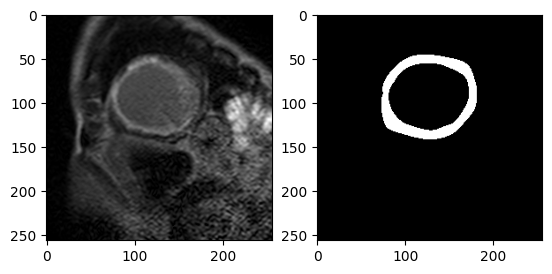

In [468]:
k, i = 0, 2
img = data[Pt[k]][0][i]
mask = data[Pt[k]][1][i]
print(f'\nk, i = 0, 2')
print(f"Pt[k] = '{Pt[k]}'")
print(f"img  = data['{Pt[k]}'][0][{i}] (image #{i} size {img.shape})")
print(f"mask = data['{Pt[k]}'][1][{i}] (mask  #{i} size {mask.shape})")

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')

In [469]:
print(f'\nUnique pixel values \n{np.unique(img)}\n')
print(f'Unique mask values \n{np.unique(mask)}\n')
print(f'Pixel value range \n{int(np.min(img))}-{int(np.max(img))}\n')


Unique pixel values 
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192.

In [470]:
len(data[Pt[0]][0])

9

In [471]:
len(Pt)

58

In [472]:
import copy
datan = copy.deepcopy(data)

In [473]:
for k in range(len(Pt)):
    print(f"\nPt[k] = '{Pt[k]}'")
    for i in range(len(data[Pt[k]][0])):
        img = data[Pt[k]][0][i]
        mask = data[Pt[k]][1][i]
        datan[Pt[k]][0][i] = datan[Pt[k]][0][i]/255
        print(f"   {i} img  = data['{Pt[k]}'][0][{i}] (image #{i} size {img.shape}) Pixel value range {int(np.min(data[Pt[k]][0][i]))}-{int(np.max(data[Pt[k]][0][i]))}")
        print(f"   {i} img  = data['{Pt[k]}'][0][{i}] (image #{i} size {img.shape}) Pixel value range {(np.min(datan[Pt[k]][0][i]))}-{(np.max(datan[Pt[k]][0][i]))}")
        print(f"   {i} mask = data['{Pt[k]}'][1][{i}] (mask  #{i} size {mask.shape})")



Pt[k] = 'PM123'
   0 img  = data['PM123'][0][0] (image #0 size (256, 256)) Pixel value range 0-262
   0 img  = data['PM123'][0][0] (image #0 size (256, 256)) Pixel value range 0.0-1.0274509803921568
   0 mask = data['PM123'][1][0] (mask  #0 size (256, 256))
   1 img  = data['PM123'][0][1] (image #1 size (256, 256)) Pixel value range 0-242
   1 img  = data['PM123'][0][1] (image #1 size (256, 256)) Pixel value range 0.0-0.9490196078431372
   1 mask = data['PM123'][1][1] (mask  #1 size (256, 256))
   2 img  = data['PM123'][0][2] (image #2 size (256, 256)) Pixel value range 0-222
   2 img  = data['PM123'][0][2] (image #2 size (256, 256)) Pixel value range 0.0-0.8705882352941177
   2 mask = data['PM123'][1][2] (mask  #2 size (256, 256))
   3 img  = data['PM123'][0][3] (image #3 size (256, 256)) Pixel value range 0-244
   3 img  = data['PM123'][0][3] (image #3 size (256, 256)) Pixel value range 0.0-0.9568627450980393
   3 mask = data['PM123'][1][3] (mask  #3 size (256, 256))
   4 img  = dat

2. THE TRAINED MODELS

In [22]:
MODELS = [f for f in os.listdir() if '.h' in f]
res_mod = [f for f in os.listdir() if 'residual.h' in f][0]
mul_mod = [f for f in os.listdir() if 'multires.h' in f][0]
print(f'res_mod = {res_mod}')
print(f'mul_mod = {mul_mod}')


res_mod = best_model_residual.h5
mul_mod = best_model_multires.h5


3. RUNNING THE MODEL

In [23]:
mte.pred_patient_set(res_mod, datan, 'test',  'c:/EKG/segm')

Predicting with test on PM123


Predicting with test on PM240


Predicting with test on PM271


Predicting with test on PM346


Predicting with test on PM295


Predicting with test on PM136


Predicting with test on PM321


Predicting with test on PM188


Predicting with test on PM325


Predicting with test on PM105


Predicting with test on PM068


Predicting with test on PM014


Predicting with test on PM072


Predicting with test on PM304


Predicting with test on PM064


Predicting with test on PM330


Predicting with test on PM176


Predicting with test on PM110


Predicting with test on PM149


Predicting with test on PM255


Predicting with test on PM209


Predicting with test on PM267


Predicting with test on PM074


Predicting with test on PM099


Predicting with test on PM340


Predicting with test on PM324


Predicting with test on PM139


Predicting with test on PM298


Predicting with test on PM277


Predicting with test on PM310


Predicting with test on PM038


Predicting with test on PM317


Predicting with test on PM131


Predicting with test on PM269


Predicting with test on PM039


Predicting with test on PM132


Predicting with test on PM080


Predicting with test on PM067


Predicting with test on PM273


Predicting with test on PM069


Predicting with test on PM023


Predicting with test on PM061


Predicting with test on PM009


Predicting with test on PM322


Predicting with test on PM160


Predicting with test on PM319


Predicting with test on PM090


Predicting with test on PM152


Predicting with test on PM060


Predicting with test on PM036


Predicting with test on PM191


Predicting with test on PM259


Predicting with test on PM182


Predicting with test on PM171


Predicting with test on PM113


Predicting with test on PM084


Predicting with test on PM199


Predicting with test on PM287
